# 0. Read XML and get measures to invert chords

### A. Parse tree

In [39]:
import xml.etree.cElementTree as ET

filename = "../../XMLs/jinglebells.xml"
tree = ET.parse(filename)


In [40]:
root = tree.getroot()
root.tag, root.attrib

('score-partwise', {})

In [41]:
all_notes = root.findall('.//note')

### B. Read measures

In [42]:
from mxlParsing import *

xml_measures = root.findall('.//measure')
measures = []

for xml_measure in xml_measures:
    measure = Measure(get_meas_notes_xml(xml_measure))
    if not measure.get_sos()==['0']:
        measures.append(measure)

In [43]:
for measure in measures:
    measure.printMeasure()

Note: G4 / quarter / None
Note: E5 / quarter / None
Note: D5 / quarter / None
Note: C5 / quarter / None
Note: G4 / half / None
Note: G4 / half / None
Note: G4 / quarter / None
Note: E5 / quarter / None
Note: D5 / quarter / None
Note: C5 / quarter / None
Note: A4 / half / None
Note: A4 / half / None
Note: A4 / quarter / None
Note: F5 / quarter / None
Note: E5 / quarter / None
Note: D5 / quarter / None
Note: B4 / half / None
Note: B4 / quarter / None
Note: G5 / quarter / None
Note: G5 / quarter / None
Note: G5 / quarter / None
Note: F5 / quarter / None
Note: D5 / quarter / None
Note: E5 / whole / None
Note: G4 / quarter / None
Note: E5 / quarter / None
Note: D5 / quarter / None
Note: C5 / quarter / None
Note: G4 / half / None
Note: G4 / half / None
Note: G4 / quarter / None
Note: E5 / quarter / None
Note: D5 / quarter / None
Note: C5 / quarter / None
Note: A4 / half / None
Note: A4 / half / None
Note: A4 / quarter / None
Note: F5 / quarter / None
Note: E5 / quarter / None
Note: D5 / quar

# 1. Explore Music21

In [44]:
from music21 import *
import copy


In [45]:
import copy

it = ['M-3','P1','A4']
it

['M-3', 'P1', 'A4']

In [46]:
p = pitch.Pitch('F4')
cList = []

for i in it:
    print(i)
    pNew = p.transpose(i, inPlace=False)
    cList.append(pNew)

cList

M-3
P1
A4


[<music21.pitch.Pitch D-4>, <music21.pitch.Pitch F4>, <music21.pitch.Pitch B4>]

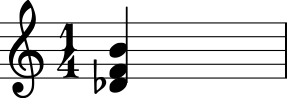

In [47]:
%matplotlib inline
import os

#Ubuntu
environment.set("musicxmlPath", "/usr/bin/musescore")
environment.set("musescoreDirectPNGPath", "/usr/bin/musescore")

#Windows
#environment.set("musicxmlPath", "C:/Program Files/MuseScore 3/bin/MuseScore3.exe")
#environment.set("musescoreDirectPNGPath", "C:/Program Files/MuseScore 3/bin/MuseScore3.exe")
#environment.set("lilypondPath", "C:/Program Files (x86)/LilyPond/usr/bin/lilypond.exe")

chord1 = chord.Chord(cList)
chord1.show()

In [48]:
chord1.inversion(0)

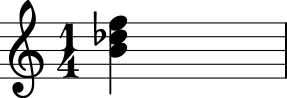

In [49]:
chord1.show()

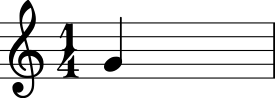

In [50]:
n = note.Note('G4')
n.show()
aInterval = interval.Interval(-24)

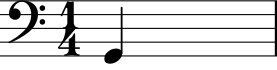

In [51]:
b = n.transpose(aInterval)
b.show()

# 2. Read with Music21

In [72]:
import xml.etree.cElementTree as ET

filename = "../../XMLs/jinglebells.xml"
tree = ET.parse(filename)
root = tree.getroot()
root.tag, root.attrib
all_notes = root.findall('.//note')
xml_measures = root.findall('.//measure')

In [73]:
from mxlParsing import *

measures = []

for xml_measure in xml_measures:
    measure = Measure(get_meas_notes_xml(xml_measure))
    if not measure.get_sos()==['0']:
        measures.append(measure)

In [74]:
for measure in measures:
    measure.printMeasure()

Note: G4 / quarter / None
Note: E5 / quarter / None
Note: D5 / quarter / None
Note: C5 / quarter / None
Note: G4 / half / None
Note: G4 / half / None
Note: G4 / quarter / None
Note: E5 / quarter / None
Note: D5 / quarter / None
Note: C5 / quarter / None
Note: A4 / half / None
Note: A4 / half / None
Note: A4 / quarter / None
Note: F5 / quarter / None
Note: E5 / quarter / None
Note: D5 / quarter / None
Note: B4 / half / None
Note: B4 / quarter / None
Note: G5 / quarter / None
Note: G5 / quarter / None
Note: G5 / quarter / None
Note: F5 / quarter / None
Note: D5 / quarter / None
Note: E5 / whole / None
Note: G4 / quarter / None
Note: E5 / quarter / None
Note: D5 / quarter / None
Note: C5 / quarter / None
Note: G4 / half / None
Note: G4 / half / None
Note: G4 / quarter / None
Note: E5 / quarter / None
Note: D5 / quarter / None
Note: C5 / quarter / None
Note: A4 / half / None
Note: A4 / half / None
Note: A4 / quarter / None
Note: F5 / quarter / None
Note: E5 / quarter / None
Note: D5 / quar

# 3. Create streams & inversion

In [75]:
stream_notes = measures[1].get_sos()
stream_notes

['G4', 'G4']

In [76]:
stream_types = measures[1].get_notetypes()
stream_types

['half', 'half']

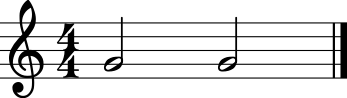

In [77]:
from music21 import *

s1 = stream.Stream()
for n,t in zip(stream_notes,stream_types):
    s1.append(note.Note(n,type=t))
s1.show()

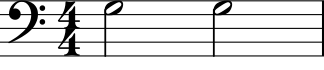

In [78]:
m2_inv = get_inverted_measure(measures[1])
m2_notes = m2_inv.get_sos()
m2_types = m2_inv.get_notetypes()
s2 = stream.Measure()
for n,t in zip(m2_notes,m2_types):
    s2.append(note.Note(n,type=t))
s2.show()


In [79]:
midi.realtime.StreamPlayer(s1).play()

In [80]:
midi.realtime.StreamPlayer(s2).play()

# 4. Helper functions

In [81]:
def measures_to_m21Part(measures):
    '''Builds a Score in m21 format from array of Measure types'''
    
    score = None
    score = stream.Part()

    for measure in measures:
        s1 = stream.Measure()
        measure_notes = measure.notes
        for n in measure_notes:

            #handle rests
            if n.step == '':
                s1.append(note.Rest(type=n.notetype))
            #notes
            else:
                m21Note = note.Note(n.get_so(),type=n.notetype)
                if n.tie:
                    m21Note.tie = tie.Tie(n.tie)
                s1.append(m21Note)
        score.append(s1)
        
    return score
    

In [82]:
def build_m21Score(part1,part2):
    '''builds a m21 score from 2 parts'''
    clef1 = clef.TrebleClef()
    clef1.offset = 0.0
    part1.offset = 0.0
    part1.id = 'mainPart'

    clef2 = clef.BassClef()
    clef2.offset = 0.0
    part2.offset = 0.0
    part2.id = 'accPart'

    score = stream.Score([clef1, part1, clef2, part2])
    #s2.duration.quarterLength

    return score

# 5. Try exporting to xml

In [83]:
get_ts_xml(root)

(4, 4)

In [84]:
get_bpm_xml(root)

(120, 'quarter')

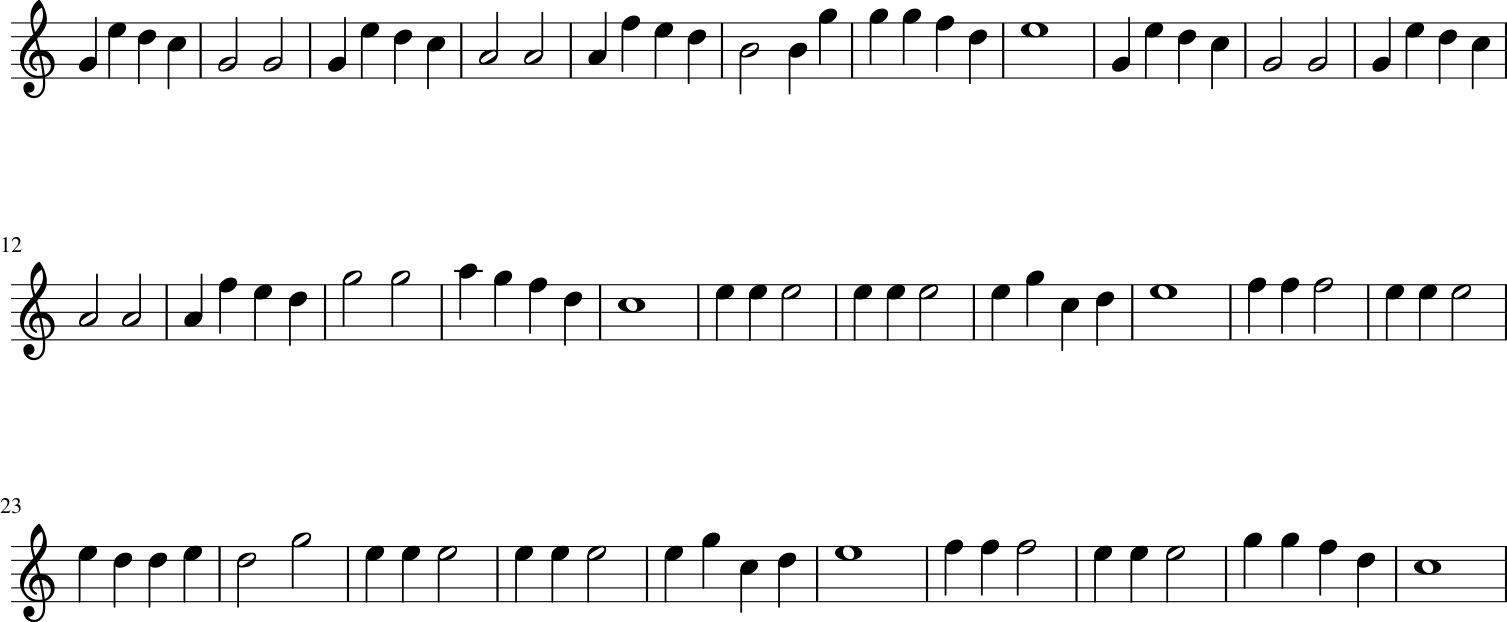

In [85]:
from music21 import *

score = None
score = stream.Part()

for measure in measures:
    s1 = stream.Measure()
    measure_notes = measure.notes
    for n in measure_notes:
        
        #handle rests
        if n.step == '':
            s1.append(note.Rest(type=n.notetype))
        #notes
        else:
            m21Note = note.Note(n.get_so(),type=n.notetype)
            if n.tie:
                m21Note.tie = tie.Tie(n.tie)
            s1.append(m21Note)
    score.append(s1)

score.show()

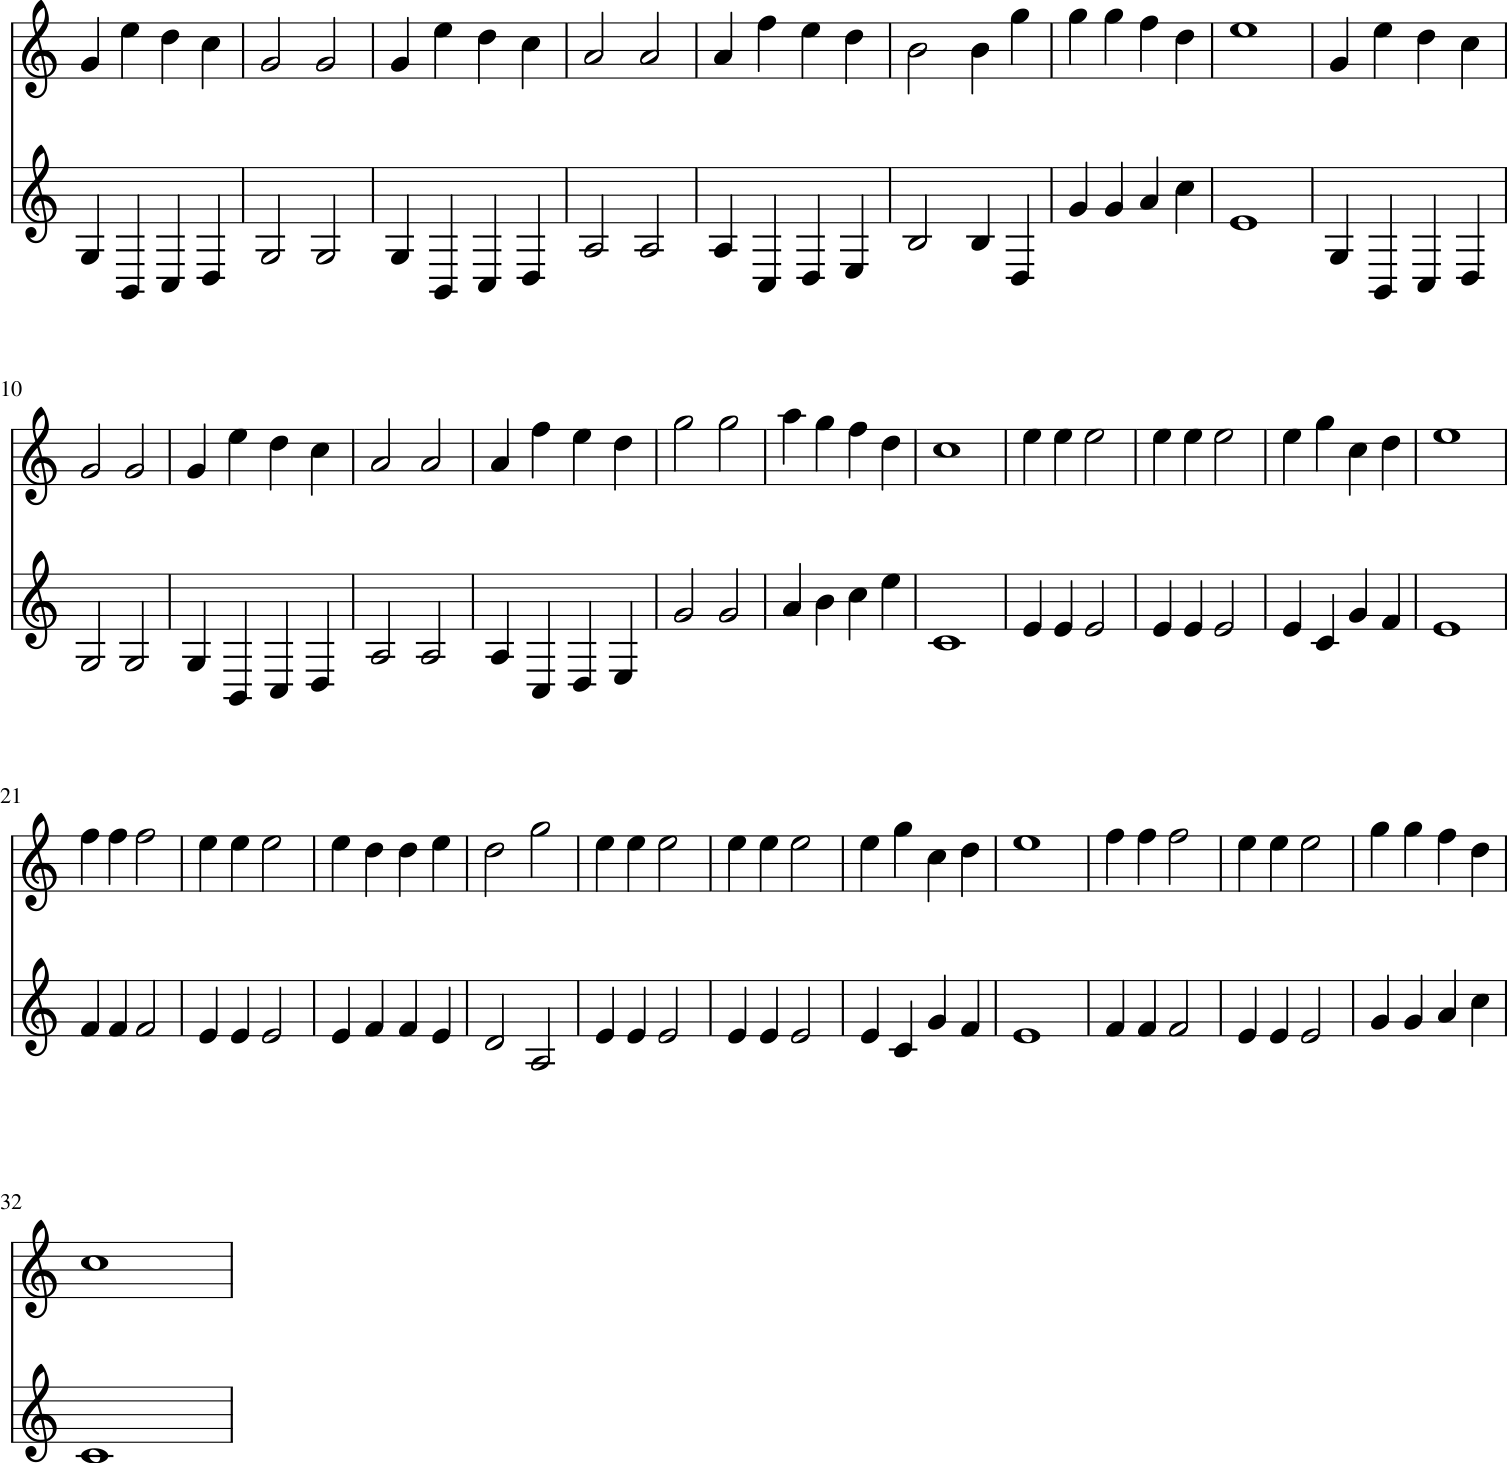

In [86]:
#Try with function

#get inv measures
inv_measures = []
for measure in measures:
    inv_measures.append(get_inverted_measure(measure))
    
#make parts
m21Part_main = measures_to_m21Part(measures)
m21Part_acc = measures_to_m21Part(inv_measures)

#build
score = build_m21Score(m21Part_main,m21Part_acc)
score.show()

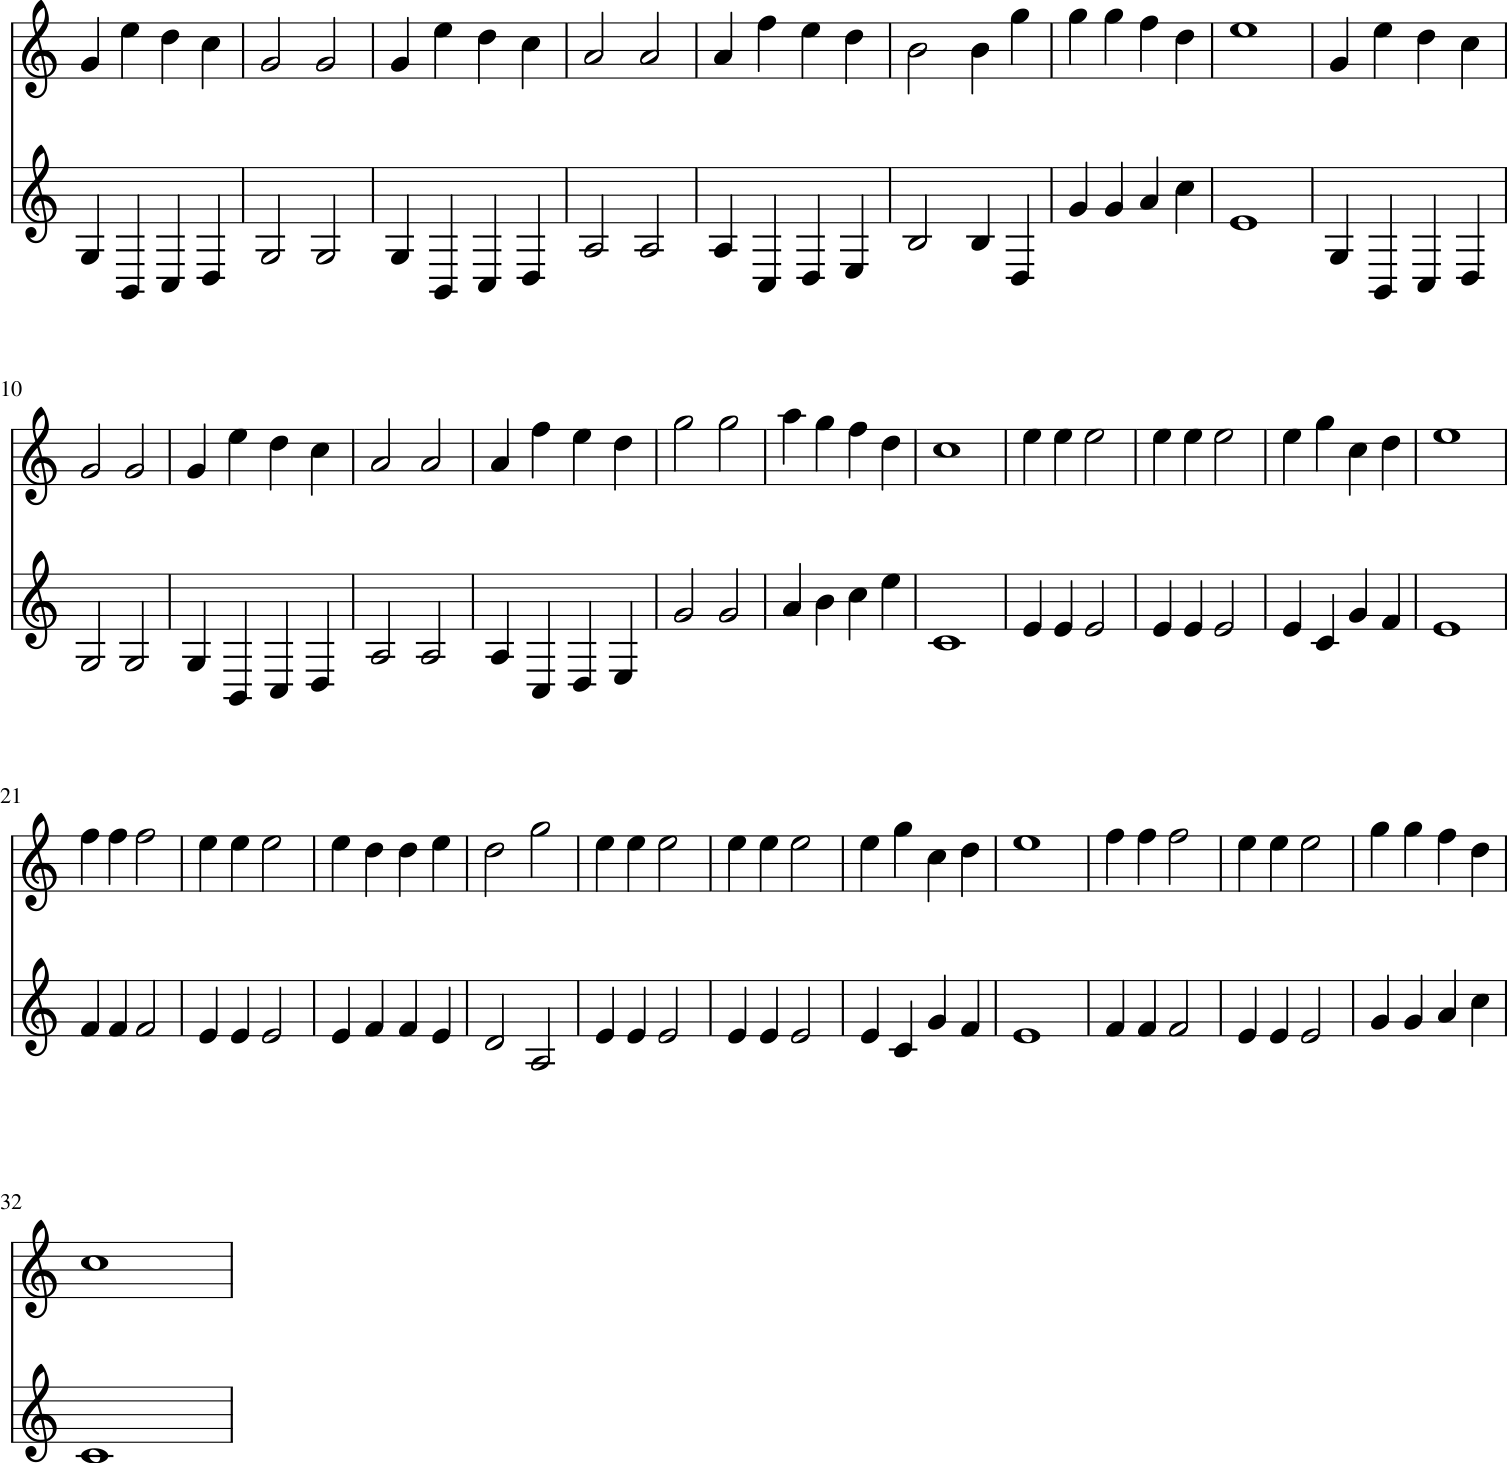

In [87]:
#make parts
part1 = m21Part_main 
part2 = m21Part_acc 

clef1 = clef.TrebleClef()
part1.id = 'mainPart'

clef2 = clef.BassClef()
part2.id = 'accPart'

scorem = stream.Score([clef1, part1, clef2, part2])
scorem.show()

In [88]:
scorem.show('midi')

In [ ]:
stry = stream.Stream()
stry.append(note.Rest(type='half'))
stry.append(note.Rest(type='quarter'))
stry.append(note.Rest(type='eighth'))
stry.append(note.Note('G4',type='eighth'))
stry.append(note.Note('G4',type='eighth'))
stry.show()

In [ ]:
c1 = clef.TrebleClef()
c1.offset = 0.0
p1.offset = 0.0
p1.id = 'embeddedPart'

c2 = clef.BassClef()
c2.offset = 0.0
p2.offset = 0.0
p2.id = 'embeddedPart'

s2 = stream.Stream([c1, n1, p1, c2, n2, p2])
s2.duration.quarterLength

s2.show()